In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report


In [68]:
df = pd.read_csv('Online_Retail.csv', encoding='iso-8859-1')

In [69]:
df.sample(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
232124,557305,22469,HEART OF WICKER SMALL,2,19/06/2020 14:42,1.65,13568.0,United Kingdom
300174,563193,23183,MOTHER'S KITCHEN SPOON REST,1,12/08/2020 16:30,7.46,NaN,United Kingdom
153941,549833,21470,FLOWER VINE RAFFIA FOOD COVER,6,12/04/2020 13:19,3.75,13458.0,United Kingdom
105130,545216,90211B,JET BLACK LAS VEGAS NECKLACE 45CM,1,28/02/2020 16:50,5.82,NaN,United Kingdom
362785,568518,22635,CHILDS BREAKFAST SET DOLLY GIRL,2,27/09/2020 12:53,9.95,12680.0,France
50551,540551,35651,VINTAGE BEAD PINK SCARF,15,10/01/2020 09:43,3.36,NaN,United Kingdom
274234,560893,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,21/07/2020 17:08,4.95,13804.0,United Kingdom
462056,575959,23454,THREE MINI HANGING FRAMES,2,13/11/2020 12:27,4.15,14547.0,United Kingdom
259148,559690,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,12,11/07/2020 15:52,2.10,16422.0,United Kingdom
513960,579666,23199,JUMBO BAG APPLES,10,30/11/2020 12:31,2.08,14893.0,United Kingdom


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [71]:
#cambio del nombre de las columnas a minusculas
new_col_name = []

for old_name in df.columns:
    name_stripped = old_name.strip()
    # Luego, pon todas las letras en minúsculas
    name_lowered = name_stripped.lower()
    # Por último, reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_name.append(name_no_spaces)

df.columns = new_col_name


In [72]:
#cambio de tipo de la columna invoce_date a datetime
df['invoice_date']=pd.to_datetime(df['invoice_date'], format="%d/%m/%Y %H:%M")

In [73]:
#se llenan los nan de la columna customer_id con 0
df['customer_id'] = df['customer_id'].fillna(0)

In [74]:
#cambio del tipo de la columna customer_id a entero
df['customer_id'] = df['customer_id'].astype(int)

In [75]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
277767,561192,22098,BOUDOIR SQUARE TISSUE BOX,2,2020-07-25 13:45:00,0.39,16033,United Kingdom
382183,569898,22395,PAPERWEIGHT VINTAGE PAISLEY,1,2020-10-06 16:08:00,4.96,0,United Kingdom
245459,558614,84584,PINK GINGHAM CAT WITH SCARF,7,2020-06-30 15:56:00,1.63,0,United Kingdom
345452,567166,82582,AREA PATROLLED METAL SIGN,12,2020-09-18 12:15:00,2.10,13078,United Kingdom
249357,558904,22101,MIRROR MOSAIC VOTIVE HOLDER,20,2020-07-04 16:18:00,2.46,0,United Kingdom
489287,578006,C2,CARRIAGE,1,2020-11-22 12:40:00,50.00,13363,United Kingdom
296594,562924,23165,LARGE CERAMIC TOP STORAGE JAR,4,2020-08-10 14:49:00,1.65,16750,United Kingdom
296298,562881,23031,DRAWER KNOB CRACKLE GLAZE PINK,6,2020-08-10 10:57:00,1.65,15632,United Kingdom
373899,569367,23184,BULL DOG BOTTLE OPENER,2,2020-10-03 15:28:00,4.95,13994,United Kingdom
210876,555326,21929,JUMBO BAG PINK VINTAGE PAISLEY,3,2020-06-02 11:03:00,4.13,0,United Kingdom


In [76]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [77]:
#se remplaza el nombre de los paises agregaqdos como EIRE y RSA para unificar todos los nombres en ingles y mayusculas y minusculas 
df['region']= df['region'].replace('EIRE', 'Ireland')

In [78]:
df['region']= df['region'].replace('RSA', 'Sudafrica')

In [79]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'Sudafrica'], dtype=object)

In [80]:
#verificacion de los valores menores a cero en la columan quantity. Aun falta determinar que tratamiento se le daran a estos datos 
df[df['quantity'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
141,C536379,D,Discount,-1,2019-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2019-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2020-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2020-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2020-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2020-12-09 11:58:00,1.25,17315,United Kingdom


In [81]:
#verificacion de los valores menores a cero en la columan unit_price. Aun falta determinar que tratamiento se le daran a estos datos 
df[df['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
299983,A563186,B,Adjust bad debt,1,2020-08-12 14:51:00,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2020-08-12 14:52:00,-11062.06,0,United Kingdom


In [82]:
#creacion de una nueva columana que calcula el total vendido por factura 
df['total'] = df['quantity'] * df['unit_price']

In [83]:
#se convierten las descripciones a minuscula para unificar el formato 
df['description'] = df['description'].str.lower()

In [84]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
22699,538177,21680,woodland stickers,1,2019-12-10 09:51:00,1.66,0,United Kingdom,1.66
131329,547552,22131,food container set 3 love heart,1,2020-03-23 15:55:00,4.13,0,United Kingdom,4.13
241705,558240,21381,mini wooden happy birthday garland,1,2020-06-27 15:27:00,3.29,0,United Kingdom,3.29
28595,538646,22760,tray breakfast in bed,5,2019-12-13 14:55:00,12.75,17293,United Kingdom,63.75
489700,578022,20751,funky washing up gloves assorted,1,2020-11-22 13:25:00,2.10,17371,United Kingdom,2.10
363731,568576,21731,red toadstool led night light,24,2020-09-28 09:40:00,1.65,17017,United Kingdom,39.60
60930,541423,21802,christmas tree heart decoration,13,2020-01-17 17:54:00,0.42,0,United Kingdom,5.46
91324,544094,20719,woodland charlotte bag,10,2020-02-16 09:11:00,0.85,15810,United Kingdom,8.50
50755,540552,21363,home small wood letters,3,2020-01-10 09:44:00,4.95,16350,United Kingdom,14.85
428699,573496,22999,travel card wallet vintage leaf,1,2020-10-31 11:59:00,0.42,17841,United Kingdom,0.42


In [85]:
#verificar que no existe ningun valor 0 en la columna quantity; sin embargo tener en cuenta que si existen aun menores a 0 
df[df['quantity'] == 0]


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [86]:
#se decide eliminar del dataframe los datos que en unit_price y en customer_id sean iguales a 0, dado que consideramos no aportan ningun informacion util para futuros analisis
ceros = df.query(('unit_price == 0 & customer_id == 0'))
display(ceros)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
622,536414,22139,NaN,56,2019-12-01 11:52:00,0.0,0,United Kingdom,0.0
1970,536545,21134,NaN,1,2019-12-01 14:32:00,0.0,0,United Kingdom,0.0
1971,536546,22145,NaN,1,2019-12-01 14:33:00,0.0,0,United Kingdom,0.0
1972,536547,37509,NaN,1,2019-12-01 14:33:00,0.0,0,United Kingdom,0.0
1987,536549,85226A,NaN,1,2019-12-01 14:34:00,0.0,0,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2020-12-08 10:33:00,0.0,0,United Kingdom,0.0
538504,581406,46000M,polyester filler pad 45x45cm,240,2020-12-08 13:58:00,0.0,0,United Kingdom,0.0
538505,581406,46000S,polyester filler pad 40x40cm,300,2020-12-08 13:58:00,0.0,0,United Kingdom,0.0
538554,581408,85175,NaN,20,2020-12-08 14:06:00,0.0,0,United Kingdom,0.0


In [87]:
#verificacion relacionado con los datos eliminados 
ceros['description'].unique()

array([nan, 'amazon', '?', 'check', 'damages',
       'cream sweetheart letter rack', 'zinc willie winkie  candle stick',
       'box of 24 cocktail parasols', 'doormat english rose ',
       'doormat 3 smiley cats', 'green regency teacup and saucer',
       'french blue metal door sign 7', 'french blue metal door sign 5',
       'french blue metal door sign 6', 'french blue metal door sign 4',
       'french blue metal door sign no', 'french blue metal door sign 8',
       'french blue metal door sign 1', 'red kitchen scales',
       'ivory kitchen scales', 'set of 6 soldier skittles',
       'childs garden trowel blue ', 'childrens garden gloves blue',
       'picnic basket wicker small', 'picnic basket wicker large',
       'empire union jack tv dinner tray',
       'tv dinner tray vintage paisley', 'spaceboy tv dinner tray',
       'tv dinner tray dolly girl', 'childs garden spade blue',
       'childs garden rake blue', 'watering can pink bunny',
       'enamel fire bucket cream',

In [88]:
#verificacion relacionado con los datos eliminados 
ceros['region'].unique()

array(['United Kingdom', 'Ireland'], dtype=object)

In [89]:
#verificacion relacionado con los datos eliminados 
ceros['invoice_date'].dt.year.unique()


array([2019, 2020], dtype=int32)

In [90]:
#verificacion relacionado con los datos eliminados 
ceros['invoice_date'].dt.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [91]:
#se filta el data frame despues de las verificaciones anteriores para conservar unicamente los datos que sean diferentes a 0 
df = df.query(('unit_price != 0 & customer_id != 0'))

In [92]:
df.sample(20)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
8845,537154,84029E,red woolly hottie white heart.,3,2019-12-05 13:05:00,3.75,15808,United Kingdom,11.25
428563,573485,23366,set 12 colouring pencils doily,4,2020-10-31 11:37:00,0.65,15752,United Kingdom,2.60
533824,581116,20761,blue paisley sketchbook,1,2020-12-07 12:21:00,3.75,17232,United Kingdom,3.75
520319,580278,22413,metal sign take it or leave it,3,2020-12-02 13:11:00,2.95,13560,United Kingdom,8.85
157063,550189,82484,wood black board ant white finish,2,2020-04-14 19:15:00,7.95,13230,United Kingdom,15.90
399145,571272,23405,home sweet home 2 drawer cabinet,8,2020-10-16 12:19:00,4.95,13878,United Kingdom,39.60
159894,550389,20974,12 pencils small tube skull,4,2020-04-18 11:53:00,0.65,17284,United Kingdom,2.60
483830,577508,85035C,rose 3 wick morris box candle,6,2020-11-20 12:45:00,1.25,18127,United Kingdom,7.50
289990,562346,20718,red retrospot shopper bag,20,2020-08-04 12:14:00,1.25,16187,United Kingdom,25.00
124160,546951,21879,hearts gift tape,2,2020-03-18 11:30:00,0.65,17673,United Kingdom,1.30


In [93]:
#se verificaron los posibles datos duplicados en todas las columanas posibles y concluimos que los duplicados existentes son coherentes. No se elimina ninguno
df['stock_code'].duplicated().sum()

np.int64(403105)

In [94]:
df.describe()


,quantity,invoice_date,unit_price,customer_id,total
count,406789.000000,406789,406789.000000,406789.000000,406789.000000
mean,12.028359,2020-07-10 12:24:04.519295744,3.460811,15287.795830,20.403860
min,-80995.000000,2019-12-01 08:26:00,0.001000,12346.000000,-168469.600000
25%,2.000000,2020-04-06 15:02:00,1.250000,13954.000000,4.200000
50%,5.000000,2020-07-31 11:46:00,1.950000,15152.000000,11.100000
75%,12.000000,2020-10-20 13:06:00,3.750000,16791.000000,19.500000
max,80995.000000,2020-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,247.927842,NaN,69.318561,1713.573064,427.612692


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    406789 non-null  object        
 1   stock_code    406789 non-null  object        
 2   description   406789 non-null  object        
 3   quantity      406789 non-null  int64         
 4   invoice_date  406789 non-null  datetime64[ns]
 5   unit_price    406789 non-null  float64       
 6   customer_id   406789 non-null  int64         
 7   region        406789 non-null  object        
 8   total         406789 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 31.0+ MB


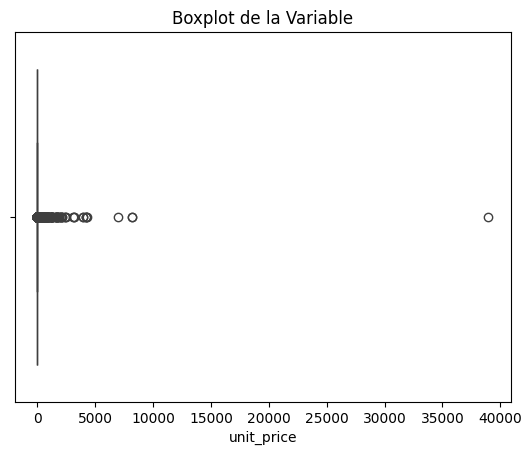

In [96]:
# Graficar un boxplot para identificar valores atípicos
sns.boxplot(x=df['unit_price'])
plt.title('Boxplot de la Variable')
plt.show()

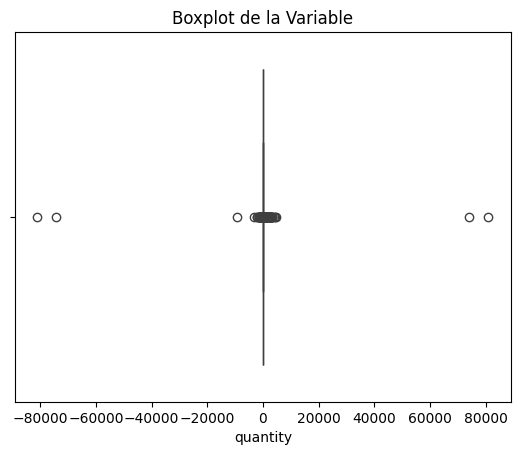

In [97]:
# Graficar un boxplot para identificar valores atípicos
sns.boxplot(x=df['quantity'])
plt.title('Boxplot de la Variable')
plt.show()

In [98]:
def define_limits(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr= q3-q1
    
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    for value in df[column]:
        print(f"Los limites inferior y superior son {column,lower, upper}")
        return lower, upper
 

In [99]:
define_limits(df, "quantity")
define_limits(df, "unit_price")

Los limites inferior y superior son ('quantity', np.float64(-13.0), np.float64(27.0))
Los limites inferior y superior son ('unit_price', np.float64(-2.5), np.float64(7.5))


(np.float64(-2.5), np.float64(7.5))

In [100]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    df = df.loc[(df[column] >= lower) & (df[column] <= upper)]
    return df

In [101]:
df_filtered = df.copy()

for col in ['quantity', 'unit_price']:
    df_filtered = remove_outliers(df_filtered, col)

df_filtered

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
0,536365,85123A,white hanging heart t-light holder,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2020-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,children's apron dolly girl,6,2020-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2020-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,2020-12-09 12:50:00,4.15,12680,France,16.60


In [102]:
df_filtered.describe()

,quantity,invoice_date,unit_price,customer_id,total
count,344362.000000,344362,344362.000000,344362.000000,344362.000000
mean,7.279883,2020-07-12 07:56:54.855704064,2.201449,15319.727281,12.399429
min,-13.000000,2019-12-01 08:26:00,0.001000,12347.000000,-81.000000
25%,2.000000,2020-04-08 08:21:00,1.250000,13988.000000,3.750000
50%,5.000000,2020-08-03 11:58:00,1.650000,15235.000000,9.960000
75%,12.000000,2020-10-23 12:28:00,2.950000,16814.000000,17.242500
max,27.000000,2020-12-09 12:50:00,7.500000,18287.000000,178.800000
std,6.880744,NaN,1.548388,1711.427166,13.390375


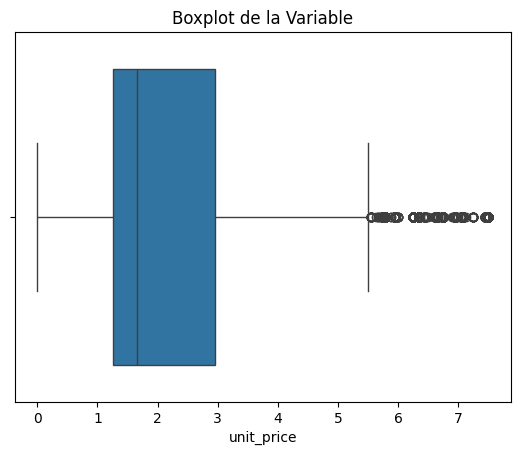

In [103]:
# Graficar un boxplot para identificar valores atípicos
sns.boxplot(x=df_filtered ['unit_price'])
plt.title('Boxplot de la Variable')
plt.show()

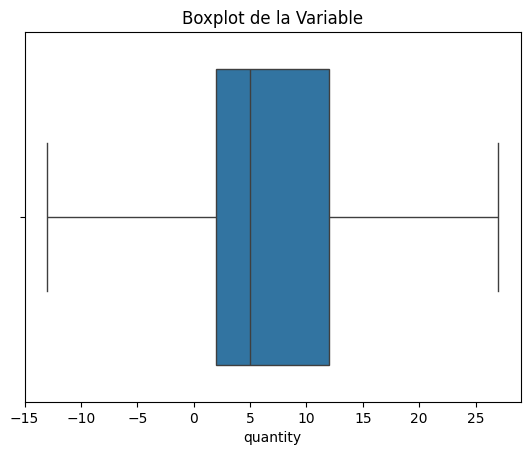

In [104]:
# Graficar un boxplot para identificar valores atípicos
sns.boxplot(x=df_filtered['quantity'])
plt.title('Boxplot de la Variable')
plt.show()

In [105]:

# Persistiendo los cambios
df = df_filtered
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
current_date = datetime.now()

# Calcula Recencia, Frecuencia y Valor Monetario
rfm_df = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (current_date - x.max()).days,
    'total': ['sum', 'count']
})

rfm_df.columns = ['Recency', 'Monetary', 'Frequency']
rfm_df.reset_index(inplace=True)

# Asigna puntuaciones RFM
rfm_df['R_rank'] = pd.qcut(rfm_df['Recency'], 5, labels=False, duplicates='drop') + 1
rfm_df['F_rank'] = pd.qcut(rfm_df['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm_df['M_rank'] = pd.qcut(rfm_df['Monetary'], 5, labels=False, duplicates='drop') + 1

# Puedes combinar las puntuaciones en un código RFM para cada cliente
rfm_df['RFM_Score'] = rfm_df['R_rank'].astype(str) + rfm_df['F_rank'].astype(str) + rfm_df['M_rank'].astype(str)

# Muestra los resultados
print(rfm_df.head())

   customer_id  Recency  Monetary  Frequency  R_rank  F_rank  M_rank RFM_Score
0        12347     1305   3314.73        166       1       5       5       155
1        12348     1552     90.20          6       5       1       1       511
2        12349     1322    999.15         58       2       4       4       244
3        12350     1614    294.40         16       5       2       2       522
4        12352     1339   1010.61         73       3       4       4       344


In [106]:
# Función para asignar segmentos
def segment_customer(row):
    if row['R_rank'] >= 4 and row['F_rank'] >= 4 and row['M_rank'] >= 4:
        return 'Alto_valor'
    elif row['F_rank'] >= 4 and row['M_rank'] >= 4:
        return 'Leal'
    elif row['R_rank'] >= 4 and row['F_rank'] >= 4:
        return 'Potencial'
    elif row['R_rank'] >= 4:
        return 'Mas_Atención'
    elif row['F_rank'] >= 4:
        return 'Oportunidad'
    elif row['R_rank'] >= 4:
        return 'Nuevo'
    elif row['M_rank'] >= 4:
        return 'Alto_Riesgo'
    else:
        return 'Cliente_Perdido'

# Aplica la función de segmentación
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Muestra los resultados
print(rfm_df.head())

   customer_id  Recency  Monetary  Frequency  R_rank  F_rank  M_rank  \
0        12347     1305   3314.73        166       1       5       5   
1        12348     1552     90.20          6       5       1       1   
2        12349     1322    999.15         58       2       4       4   
3        12350     1614    294.40         16       5       2       2   
4        12352     1339   1010.61         73       3       4       4   

  RFM_Score       Segment  
0       155          Leal  
1       511  Mas_Atención  
2       244          Leal  
3       522  Mas_Atención  
4       344          Leal  


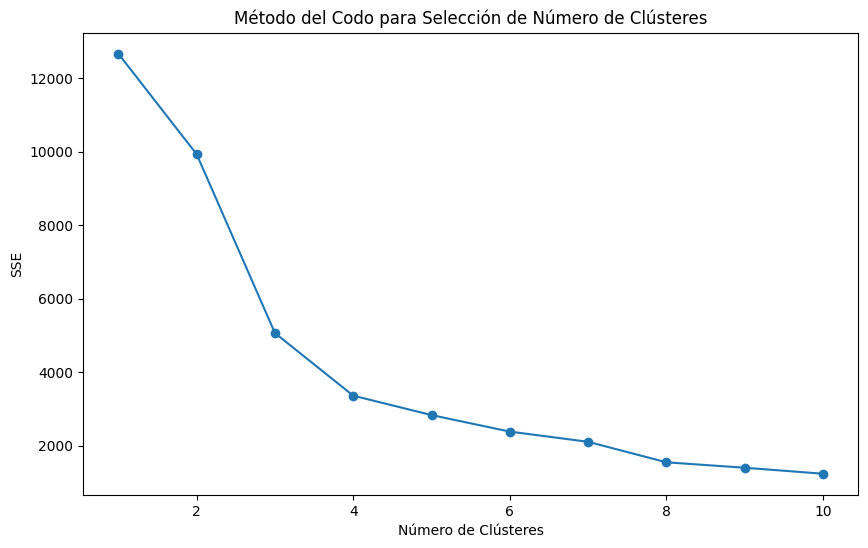

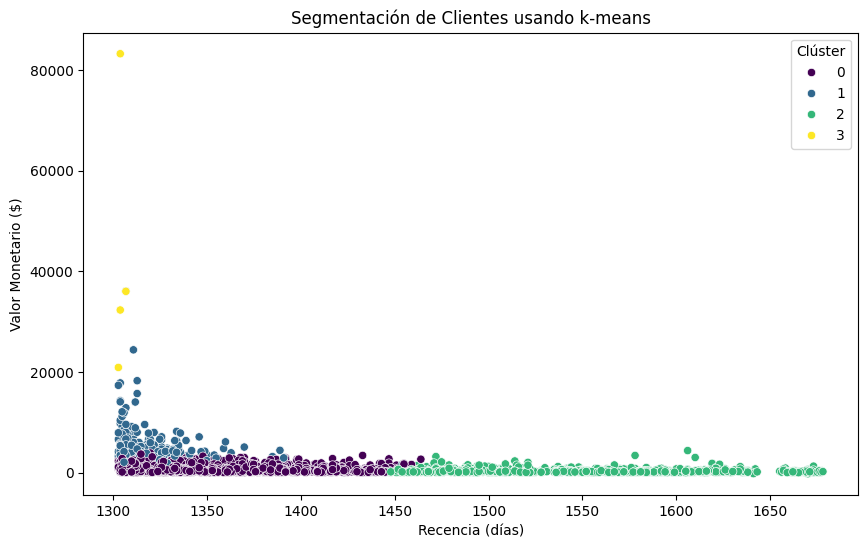

Cluster
0    2880
2    1045
1     292
3       4
Name: count, dtype: int64
        Recency         Frequency         Monetary               
           mean  median      mean  median     mean   median count
Cluster                                                          
0        1346.1  1335.0      63.2    44.0    799.7    561.0  2880
1        1316.9  1312.0     397.8   320.0   5094.1   4216.5   292
2        1551.8  1546.0      24.4    15.0    293.6    202.2  1045
3        1304.5  1304.0    5196.2  4526.5  43118.4  34162.8     4


In [107]:
# Normalizar los datos
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Método del codo para encontrar el número óptimo de clústeres
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para Selección de Número de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')
plt.show()

# Aplicar k-means con el número óptimo de clústeres (supongamos k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes usando k-means')
plt.xlabel('Recencia (días)')
plt.ylabel('Valor Monetario ($)')
plt.legend(title='Clúster')
plt.show()

# Distribución de clientes por clúster
print(rfm_df['Cluster'].value_counts())

# Estadísticas descriptivas por clúster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)
print(cluster_summary)


Cluster Summary Sorted by Monetary Value:
          Recency  Frequency  Monetary
Cluster                              
2         1551.8       24.4     293.6
0         1346.1       63.2     799.7
1         1316.9      397.8    5094.1
3         1304.5     5196.2   43118.4


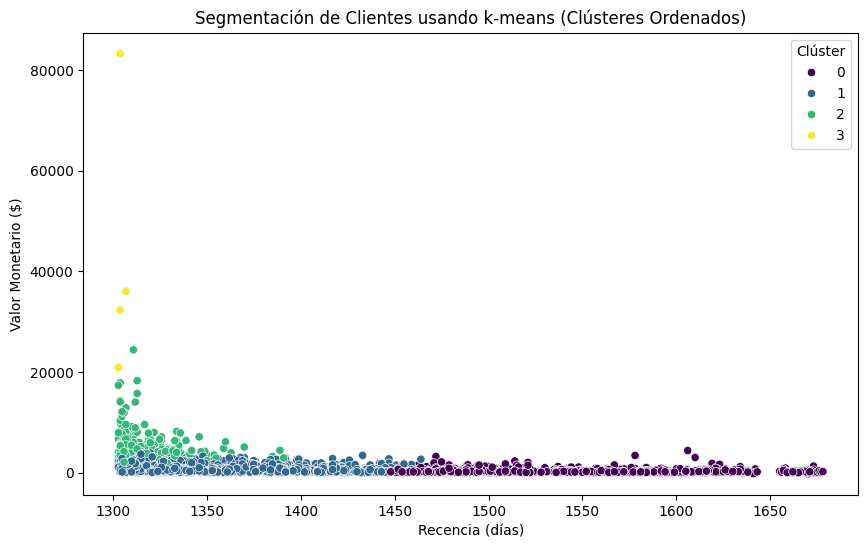

Cluster
1    2880
0    1045
2     292
3       4
Name: count, dtype: int64
Cluster Summary Ordered:
         Recency         Frequency         Monetary               
           mean  median      mean  median     mean   median count
Cluster                                                          
0        1551.8  1546.0      24.4    15.0    293.6    202.2  1045
1        1346.1  1335.0      63.2    44.0    799.7    561.0  2880
2        1316.9  1312.0     397.8   320.0   5094.1   4216.5   292
3        1304.5  1304.0    5196.2  4526.5  43118.4  34162.8     4


In [108]:
# Aplicar k-means con el número óptimo de clústeres k=4
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Calcular estadísticas descriptivas por clúster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

# Ordenar los clústeres por valor monetario promedio
cluster_summary = cluster_summary.sort_values(by='Monetary')
print("Cluster Summary Sorted by Monetary Value:\n", cluster_summary)

# Crear un diccionario para mapear los clústeres originales a los nuevos clústeres ordenados
cluster_mapping = {old_cluster: new_cluster for new_cluster, old_cluster in enumerate(cluster_summary.index)}

# Reasignar los números de clústeres en el DataFrame original
rfm_df['Cluster'] = rfm_df['Cluster'].map(cluster_mapping)

# Visualizar los clústeres ordenados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes usando k-means (Clústeres Ordenados)')
plt.xlabel('Recencia (días)')
plt.ylabel('Valor Monetario ($)')
plt.legend(title='Clúster')
plt.show()

# Distribución de clientes por clúster ordenado
print(rfm_df['Cluster'].value_counts())

# Estadísticas descriptivas por clúster ordenado
cluster_summary_ordered = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)
print("Cluster Summary Ordered:\n", cluster_summary_ordered)

In [109]:
#Se eliminando estos valores dado que no parecen ser ventas realizadas como tal por la empresa. 
df = df[~df['stock_code'].isin(['M', 'DOT', 'POST'])]

In [110]:
#se filta el data frame despues de las verificaciones anteriores para conservar unicamente los datos que sean diferentes a 0 

df = df.query('unit_price > 0.0 & customer_id > 0 & quantity > 0')

In [111]:
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
0,536365,85123A,white hanging heart t-light holder,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2020-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,children's apron dolly girl,6,2020-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2020-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,2020-12-09 12:50:00,4.15,12680,France,16.60


MODELADO SIN CALCULO DE CLTV

In [112]:
# Contar el número de compras por cliente
compras_por_cliente = df.groupby('customer_id')['invoice_no'].nunique()

# Crear una columna 'compras_unica' en rfm_df
df['Churn'] = df['customer_id'].map(compras_por_cliente)

# Asignar 1 a los clientes con una compra única, 0 a los clientes con más de una compra
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 1 else 0)

# Mostrar el DataFrame actualizado
df
 

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total,Churn
0,536365,85123A,white hanging heart t-light holder,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0
1,536365,71053,white metal lantern,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
2,536365,84406B,cream cupid hearts coat hanger,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0
3,536365,84029G,knitted union flag hot water bottle,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
4,536365,84029E,red woolly hottie white heart.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2020-12-09 12:50:00,0.85,12680,France,10.20,0
541905,581587,22899,children's apron dolly girl,6,2020-12-09 12:50:00,2.10,12680,France,12.60,0
541906,581587,23254,childrens cutlery dolly girl,4,2020-12-09 12:50:00,4.15,12680,France,16.60,0
541907,581587,23255,childrens cutlery circus parade,4,2020-12-09 12:50:00,4.15,12680,France,16.60,0


In [113]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 337966 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    337966 non-null  object        
 1   stock_code    337966 non-null  object        
 2   description   337966 non-null  object        
 3   quantity      337966 non-null  int64         
 4   invoice_date  337966 non-null  datetime64[ns]
 5   unit_price    337966 non-null  float64       
 6   customer_id   337966 non-null  int64         
 7   region        337966 non-null  object        
 8   total         337966 non-null  float64       
 9   Churn         337966 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 28.4+ MB


Churn
0    307447
1     30519
Name: count, dtype: int64


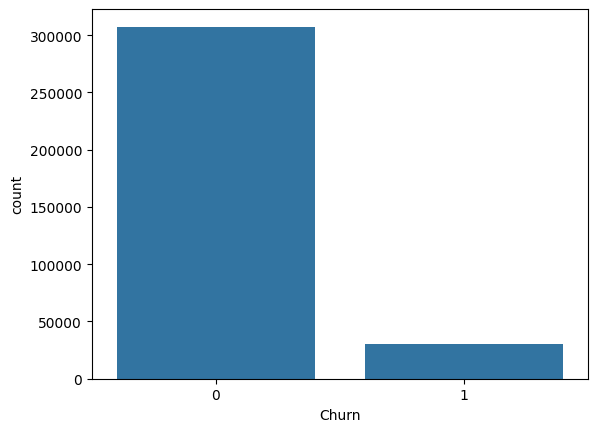

In [114]:
#Vamos a explorar como se comporta nuestra variable objetivo
class_counts = df['Churn'].value_counts()

print(class_counts)

sns.countplot(x='Churn', data=df)
plt.show()

In [115]:
# Características adicionales
df_additional = df.groupby('customer_id').agg({
    'invoice_date': [lambda x: (current_date - x.min()).days,  # Customer Lifetime
                        lambda x: x.diff().mean().days],          # Average Time Between Purchases
    'stock_code': pd.Series.nunique,   # Number of Distinct Products
  
})

df_additional.columns = ['Customer_Lifetime', 'Avg_Time_Between_Purchases', 'Distinct_Products']
df_additional.reset_index(inplace=True)



In [116]:
df_additional


,customer_id,Customer_Lifetime,Avg_Time_Between_Purchases,Distinct_Products
0,12347,1671,2.0,96
1,12348,1662,22.0,6
2,12349,1322,0.0,58
3,12350,1614,0.0,16
4,12352,1600,4.0,49
...,...,...,...,...
4186,18280,1581,0.0,8
4187,18281,1484,0.0,5
4188,18282,1429,16.0,8
4189,18283,1641,0.0,258


In [123]:
# Unir las características adicionales con las métricas RFM
df = pd.merge(df, df_additional, on='customer_id')

# Eliminar filas con valores nulos
df_cleaned = df.dropna()

df = df_cleaned

In [124]:
# Identificar las columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['Churn', 'invoice_date'])
y = df['Churn']

# Crear el ColumnTransformer con OneHotEncoder para las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Dejar el resto de las columnas sin cambios
)

# Dividir el conjunto de datos en entrenamiento, prueba y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12345)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=12345)

# Aplicar el preprocesador a los conjuntos de datos
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
X_valid = preprocessor.transform(X_valid)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)



In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# GridSearchCV con RandomForestClassifier
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [None, 10, 20]
}

estimator = RandomForestClassifier()

grid_search = GridSearchCV(estimator, param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, y_train)

print("Mejor parámetro encontrado:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Mejor parámetro encontrado: {'max_depth': None, 'n_estimators': 50}
Mejor puntuación de validación cruzada: 0.9992798704603818


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61440
           1       0.99      1.00      1.00      6140

    accuracy                           1.00     67580
   macro avg       1.00      1.00      1.00     67580
weighted avg       1.00      1.00      1.00     67580

Confusion Matrix:
[[61409    31]
 [    1  6139]]


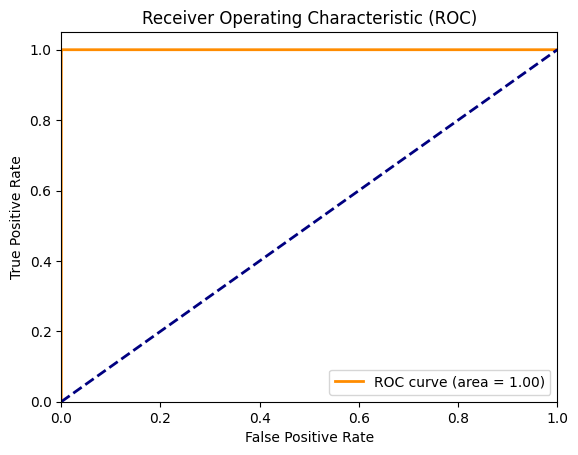

Mejor parámetro encontrado: {'max_depth': None, 'n_estimators': 50}
Mejor puntuación de validación cruzada: 0.9992798704603818


In [136]:
# Mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Imprimir el reporte de clasificación y la matriz de confusión
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calcular y graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("Mejor parámetro encontrado:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)